In [21]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import functions.sda_help as sh

Populating the interactive namespace from numpy and matplotlib


### Beispiel Adaline
Lernen der Trennflächenfunktion des Linearklassifikators mit dem Gradientenverfahren

### Dateneingabe 
Daten und Klassenbezeichnungen gemäß Aufgabe 3.8 eingeben

In [22]:
X = pd.read_pickle('data/bsp_a3-8.txt').values[:,0:2]
X = np.insert(X, 0, values=1, axis=1)
y = pd.read_pickle('data/bsp_a3-8.txt').values[:,2]

#### Gradientenabstiegsverfahren

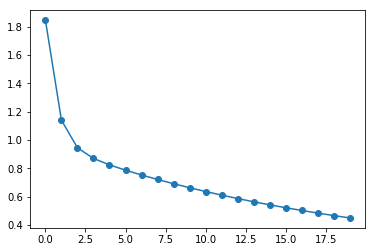

In [23]:
w = np.array([0, 1.0, -1])
eta = 0.01
n_iter = 20
cost = np.zeros(n_iter)
for i in (np.arange(0, n_iter)):
    w = w + 2 * eta * np.dot((y - np.dot(X, w.T)),X)
    cost[i] = ((y - np.dot(X, w.T))**2).sum() / 2.0
plt.plot(cost, marker = 'o')
plt.show()

<Figure size 432x288 with 0 Axes>

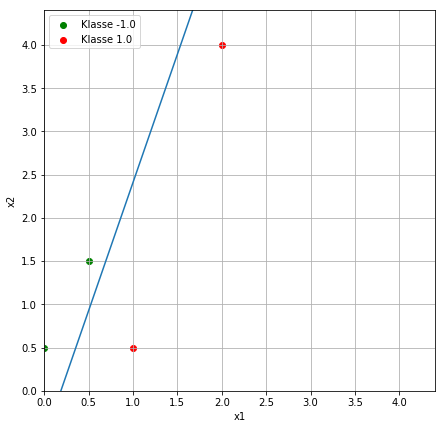

In [6]:
sh.show_res(X, y, w)

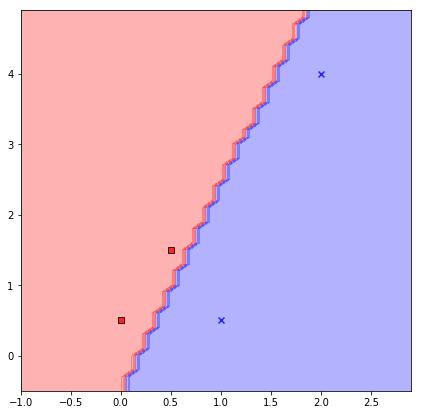

In [5]:
sh.plot_decision_regions(X[:,1:3], y, w, resolution=0.1)

### Beispiel 2
linear trennbarar Datensatz mit 20 Mustern pro Klasse

In [24]:
X = pd.read_pickle('data/df_perz.txt').values[:,0:2]
X = np.insert(X, 0, values=1, axis=1)
y = pd.read_pickle('data/df_perz.txt').values[:,2]

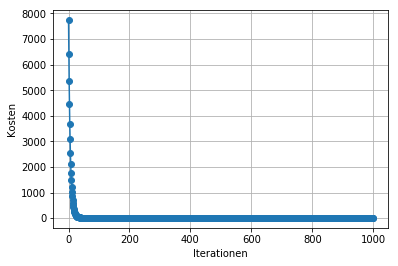

In [31]:
w = np.array([0, 0.1, 0.2])
eta = 0.0000001
n_iter = 1000
cost = np.zeros(n_iter)
for i in (np.arange(0, n_iter)):
    w = w + 2 * eta * np.dot((y - np.dot(X, w.T)),X)
    cost[i] = ((y - np.dot(X, w.T))**2).sum() / 2.0
plt.plot(cost, marker = 'o')
plt.grid()
plt.xlabel('Iterationen')
plt.ylabel('Kosten')
plt.show()

<Figure size 432x288 with 0 Axes>

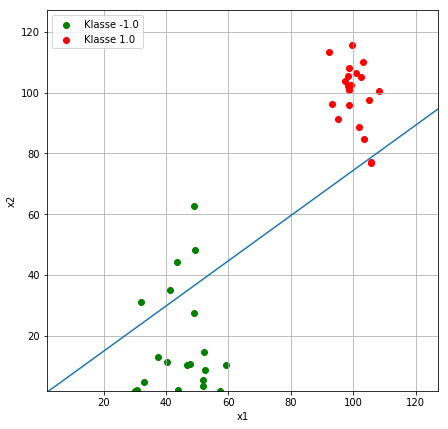

In [32]:
sh.show_res(X, y, w)

In [ ]:
sh.plot_decision_regions(X[:,1:3], y, w, resolution=0.1)

#### Normalisierung der Daten

In [33]:
X_std = np.copy(X)

In [34]:
X_std [:,1] = (X_std [:,1] - mean(X_std [:,1]))/std(X_std [:,1])
X_std [:,2] = (X_std [:,2] - mean(X_std [:,2]))/std(X_std [:,2])

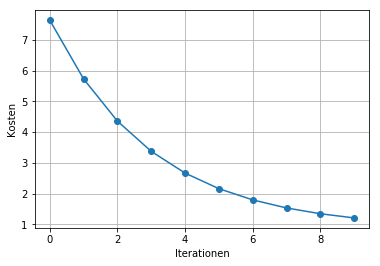

In [37]:
w = np.array([0, 0.1, 0.2])
eta = 0.001
n_iter = 10
cost = np.zeros(n_iter)
for i in (np.arange(0, n_iter)):
    w = w + 2 * eta * np.dot((y - np.dot(X_std, w.T)),X_std)
    cost[i] = ((y - np.dot(X_std, w.T))**2).sum() / 2.0
plt.plot(cost, marker = 'o')
plt.grid()
plt.xlabel('Iterationen')
plt.ylabel('Kosten')
plt.show()

<Figure size 432x288 with 0 Axes>

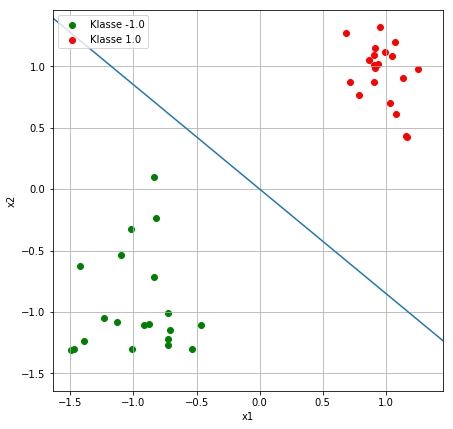

In [38]:
sh.show_res(X_std, y, w)

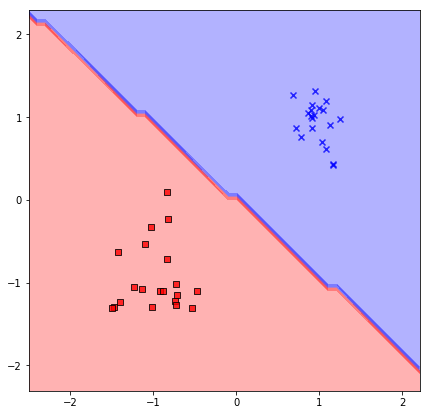

In [20]:
sh.plot_decision_regions(X_std[:,1:3], y, w, resolution=0.1)